In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from Agent import Agent
from Game import SnakeGameAI
from Model import DQN
from helper import plot

pygame 2.1.2 (SDL 2.0.18, Python 3.7.11)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
lr = 0.01
gamma = 0.9
epsilon = 0.9
epsilon_decay = [0.99999, 0.9999]
epsilon_threshold = 0.5
memory_capacity = 100000
model = DQN(11, 256, 3)
#model.load()
optimizer = optim.Adam(model.parameters(), lr=lr)
criterion = nn.MSELoss()

agent_params = {
    'gamma': gamma,
    'epsilon': 0.9,
    'epsilon_decay': epsilon_decay,
    'epsilon_threshold': epsilon_threshold,
    'memory_capacity': 100000,
    'model': model,
    'optimizer': optimizer,
    'criterion': criterion
}
agent = Agent(**agent_params)
game = SnakeGameAI()

<Figure size 432x288 with 0 Axes>

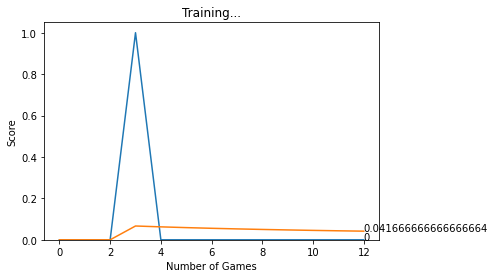

In [ ]:
plot_scores = []
plot_mean_scores = []
total_score = 0
record = 0

while True:
    
    state = game.get_observation()
    action = agent.e_greedy_action(state)
    reward, done, score = game.play_step(action)
    next_state = game.get_observation()
    
    #print(state, action,  reward,next_state, done)
    
    agent.train(state, action, reward, next_state, done)
    
    agent.remember(state, action, reward, next_state, done)
    
    if done:
        agent.n_games += 1
        game.reset()
        states, actions, rewards, next_states, dones = agent.get_sample()
        agent.train(states, actions, rewards, next_states, dones)
        
        if score > record:
            record = score
            agent.model.save()

        plot_scores.append(score)
        total_score += score
        mean_score = total_score / agent.n_games
        plot_mean_scores.append(mean_score)
        plot(plot_scores, plot_mean_scores)